These data were taken with the stage temperature regulating at about 1 K and the Hittite providing bias instead of the roach during the stream.

In [1]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 300

In [2]:
from collections import defaultdict

In [3]:
from kid_readout.measurement.io import npy
from kid_readout.measurement import plot_basic
from kid_readout.analysis.resonator import plot_resonator, lmfit_models, lmfit_resonator

In [4]:
npd = npy.NumpyDirectory('/data/detectors/2017-02-17_174646_hittite.npd/')

In [5]:
npd.node_names()

['SingleSweep0', 'SingleSweepStream1', 'ADCSnap2']

In [6]:
swp = npd.SingleSweep0
sss = npd.SingleSweepStream1
snap = npd.ADCSnap2

# Tone centering

In [7]:
sss.stream.tone_offset_frequency()

array([ 0.])

# Forward scattering versus frequency

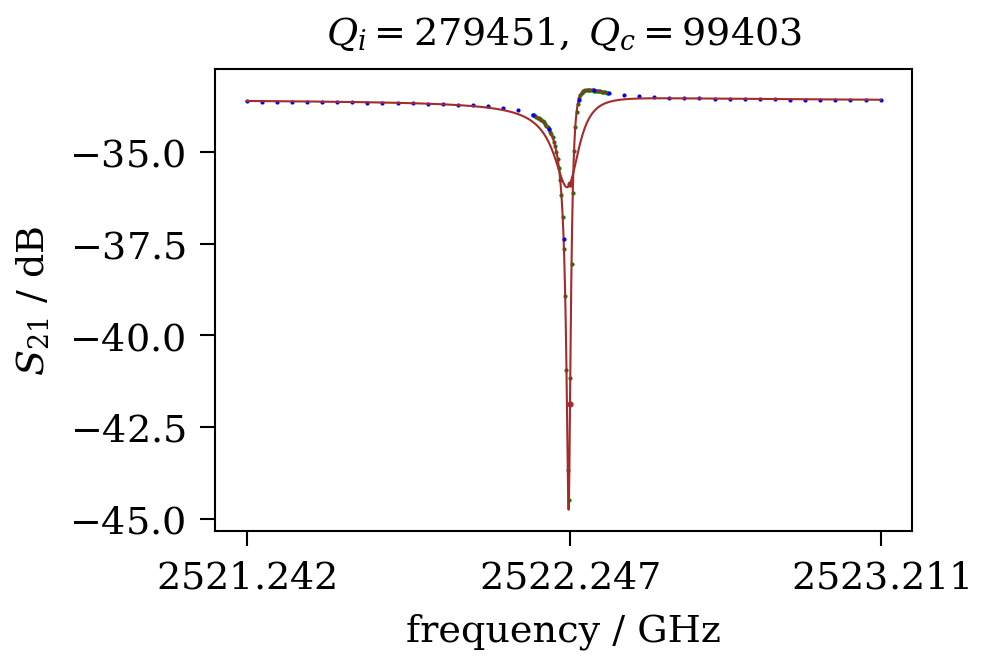

In [8]:
fig, ax = plt.subplots()
ax.set_xlabel('frequency / GHz')
ax.set_ylabel('$S_{21}$ / dB')
plot_resonator.amplitude(ax, sss.resonator, data_color='green')
plot_resonator.amplitude(ax, swp.resonator)
ax.set_title(r'$Q_i = {:.0f}, \; Q_c = {:.0f}$'.format(sss.resonator.Q_i, sss.resonator.Q_e_real))

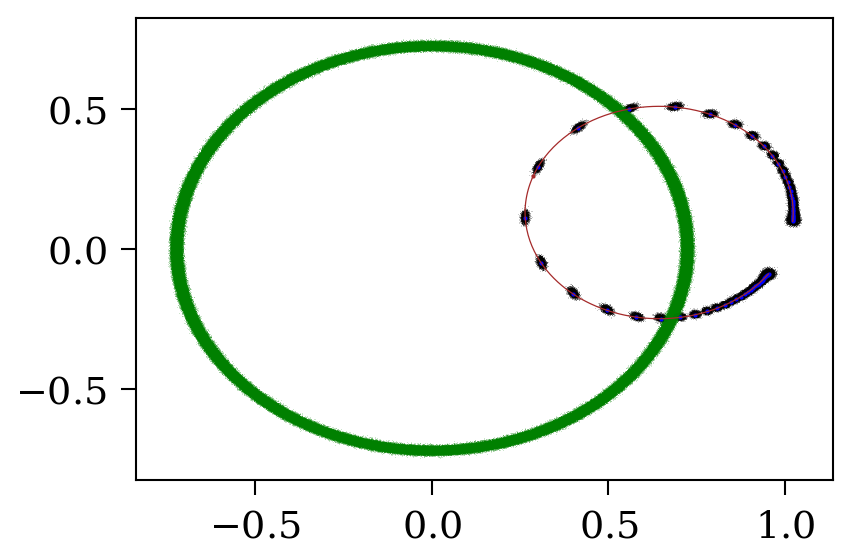

In [12]:
fig, ax = plt.subplots()
plot_basic.sss_complex_plane(sss, ax)

In [9]:
sss.stream.sample_time.size

2097152

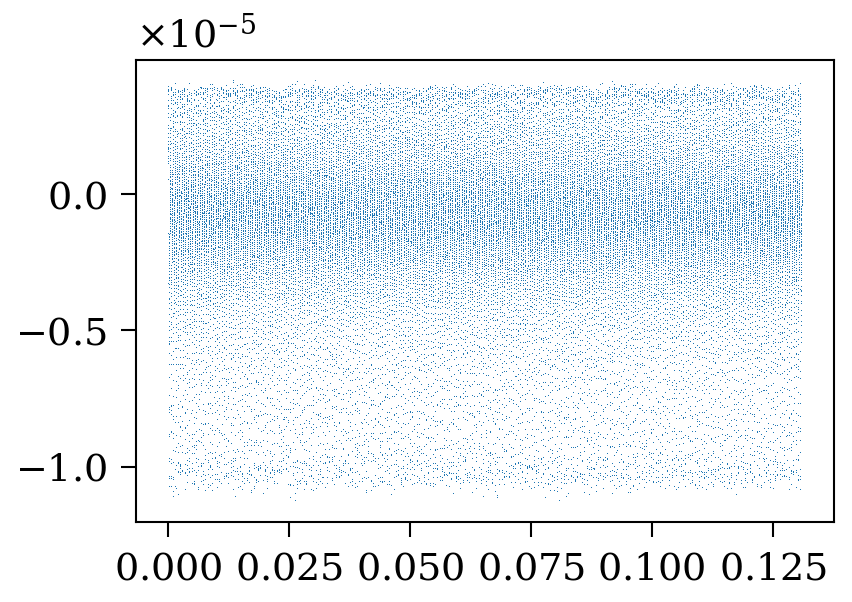

In [10]:
start_index = 0
end_index = 2**15
fig, ax = plt.subplots()
ax.plot(sss.stream.sample_time[start_index:end_index],
        sss.x[start_index:end_index], ',')

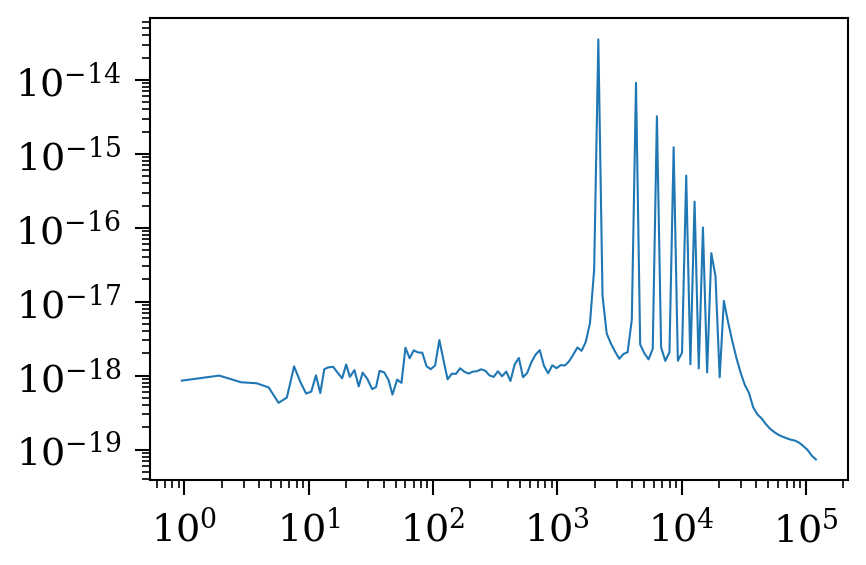

In [11]:
fig, ax = plt.subplots()
ax.loglog(sss.S_frequency, sss.S_xx)